In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from numpy import std
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from numpy import mean
from numpy import sqrt
from sklearn.model_selection import LeaveOneOut
from numpy import absolute

In [2]:
#dataset_dir = 'TG2022_Datos\Departamentos_CSV\\vulnerabilidad_all_municipalities.csv' #Se carga el dataset
dataset_dir = 'TG2022_Datos\Departamentos_CSV\Dataset_FINAL_viv_hog_fall_per.csv' #Se carga el dataset
df_dataset = pd.read_csv(dataset_dir, sep=(',')) #Se lee el archivo csv el cual está separado por comas
df_dataset = df_dataset.sort_values(['U_DPTO','U_MPIO'],ascending=True)
df_dataset

U_DPTO  U_MPIO   Nom_DPTO    CASA    APTO  TIP_CUARTO  VIV_TRAD_INDIG  \
11         5       1  Antioquia  355252  514187       22005              70   
12         5       2  Antioquia    7891     522          92               1   
13         5       4  Antioquia     883     118          54               0   
14         5      21  Antioquia    1431     690          33               0   
15         5      30  Antioquia    7892    3572         167               1   
...      ...     ...        ...     ...     ...         ...             ...   
1117      97     889     Vaupes      88       0           1               4   
1118      99       1    Vichada    4767     997         456             533   
1119      99     524    Vichada    3096      71         129              13   
1120      99     624    Vichada    1103       4          15               4   
1121      99     773    Vichada    5909      91         119            3273   

      VIV_TRAD_ETNICA  OTRA_VIV   1-DOR  ...  Tecnica_Profesional  \
11                 94      1313  205922  ...               245278   
12                  0         7    2292  ...                  433   
13                  0         2     253  ...                  107   
14                  0         3     476  ...                  214   
15                  0        15    2749  ...                 1600   
...               ...       ...     ...  ...                  ...   
1117                0         6      48  ...                    5   
1118               21       132    2873  ...                 1322   
1119                1        31    1307  ...                  393   
1120                0        16     440  ...                  126   
1121               66        52    6244  ...                  464   

      Universitario  Posgrado  Ninguno  No_inf_escolaridad  \
11           280569     82299    54515               35524   
12              304       149     1230                 143   
13               58        23       99                  27   
14              112        28      166                  43   
15              792       189     1400                 128   
...             ...       ...      ...                 ...   
1117              3         0       17                  43   
1118           1032       380     1927                 767   
1119            272        83      699                 265   
1120            145        34      267                  44   
1121            301        76     3981                2581   

      No Aplica P_NIVEL_ANOSR  No informa ingresos  Recibe ingresos  \
11                     122409                38570          1155530   
12                        923                  235             7220   
13                        131                   32              819   
14                        253                   66             1456   
15                       1455                  235            11472   
...                       ...                  ...              ...   
1117                       38                   33               27   
1118                     2099                  298             5712   
1119                     1005                  102             2341   
1120                      376                   45              981   
1121                     6078                 1805             3302   

      No recibe ingresos  No Aplica ingresos  
11                914201              264029  
12                  8060                2084  
13                  1024                 284  
14                  1768                 549  
15                 11939                3175  
...                  ...                 ...  
1117                 262                 434  
1118                8894                4884  
1119                4446                2801  
1120                1847                1153  
1121               23009               15022  

[1122 rows x 88 columns]

In [3]:
dataset_dir = 'TG2022_Datos\Departamentos_CSV\\vulnerabilidad_median_all_municipalities_no_0.CSV' #Se carga el dataset
df_dataset_y = pd.read_csv(dataset_dir, sep=(',')) #Se lee el archivo csv el cual está separado por comas
df_dataset_y['Vulnerabilidad_numero'].value_counts()

1    1017
5      55
2      15
3      10
4       5
Name: Vulnerabilidad_numero, dtype: int64

In [4]:
df_dataset_y.isnull().sum()

COD_MPIO                 0
CATEGORIA                0
ipm                      0
Vulnerabilidad_numero    0
dtype: int64

In [5]:
df_dataset_y = df_dataset_y.dropna(subset=['Vulnerabilidad_numero'])
df_dataset_y.reset_index(drop=True, inplace=True)
#data = data.dropna(subset=["Id"])
df_dataset_y

COD_MPIO  CATEGORIA        ipm  Vulnerabilidad_numero
0         5001        4.0   8.900000                      2
1         5002        1.0  15.894737                      1
2         5004        1.0   0.000000                      1
3         5021        2.0   7.816901                      1
4         5030        1.0  14.305970                      1
...        ...        ...        ...                    ...
1097     97666        2.0  38.629842                      1
1098     99001        1.0  38.461538                      1
1099     99524        1.0  48.000000                      1
1100     99624        1.0  48.636364                      1
1101     99773        2.0  38.888889                      1

[1102 rows x 4 columns]

In [6]:
df_dataset_y = df_dataset_y.astype(str)

In [7]:
df_dataset_y["U_MPIO"] = df_dataset_y['COD_MPIO'].apply(lambda x: x[-3:])
df_dataset_y["U_DPTO"] = df_dataset_y['COD_MPIO'].apply(lambda x: x[:-3])
df_dataset_y

COD_MPIO CATEGORIA                ipm Vulnerabilidad_numero U_MPIO U_DPTO
0        5001       4.0                8.9                     2    001      5
1        5002       1.0        15.89473684                     1    002      5
2        5004       1.0                0.0                     1    004      5
3        5021       2.0  7.816901408500001                     1    021      5
4        5030       1.0        14.30597001                     1    030      5
...       ...       ...                ...                   ...    ...    ...
1097    97666       2.0        38.62984218                     1    666     97
1098    99001       1.0        38.46153846                     1    001     99
1099    99524       1.0               48.0                     1    524     99
1100    99624       1.0       48.636363635                     1    624     99
1101    99773       2.0        38.88888889                     1    773     99

[1102 rows x 6 columns]

In [8]:
df_dataset_y.U_MPIO = df_dataset_y.U_MPIO.astype(int) 
df_dataset_y.U_DPTO = df_dataset_y.U_DPTO.astype(int)  
df_dataset_y.Vulnerabilidad_numero = df_dataset_y.Vulnerabilidad_numero.astype(int)  
print(df_dataset_y.dtypes)
df_dataset_y =df_dataset_y.loc[:,["Vulnerabilidad_numero","U_MPIO","U_DPTO"]]
df_dataset_y

COD_MPIO                 object
CATEGORIA                object
ipm                      object
Vulnerabilidad_numero     int32
U_MPIO                    int32
U_DPTO                    int32
dtype: object


Vulnerabilidad_numero  U_MPIO  U_DPTO
0                         2       1       5
1                         1       2       5
2                         1       4       5
3                         1      21       5
4                         1      30       5
...                     ...     ...     ...
1097                      1     666      97
1098                      1       1      99
1099                      1     524      99
1100                      1     624      99
1101                      1     773      99

[1102 rows x 3 columns]

In [9]:
df_nuevo = df_dataset_y.merge(df_dataset, on=["U_MPIO","U_DPTO"], how="right")
df_nuevo

Vulnerabilidad_numero  U_MPIO  U_DPTO   Nom_DPTO    CASA    APTO  \
0                       2.0       1       5  Antioquia  355252  514187   
1                       1.0       2       5  Antioquia    7891     522   
2                       1.0       4       5  Antioquia     883     118   
3                       1.0      21       5  Antioquia    1431     690   
4                       1.0      30       5  Antioquia    7892    3572   
...                     ...     ...     ...        ...     ...     ...   
1117                    NaN     889      97     Vaupes      88       0   
1118                    1.0       1      99    Vichada    4767     997   
1119                    1.0     524      99    Vichada    3096      71   
1120                    1.0     624      99    Vichada    1103       4   
1121                    1.0     773      99    Vichada    5909      91   

      TIP_CUARTO  VIV_TRAD_INDIG  VIV_TRAD_ETNICA  OTRA_VIV  ...  \
0          22005              70               94      1313  ...   
1             92               1                0         7  ...   
2             54               0                0         2  ...   
3             33               0                0         3  ...   
4            167               1                0        15  ...   
...          ...             ...              ...       ...  ...   
1117           1               4                0         6  ...   
1118         456             533               21       132  ...   
1119         129              13                1        31  ...   
1120          15               4                0        16  ...   
1121         119            3273               66        52  ...   

      Tecnica_Profesional  Universitario  Posgrado  Ninguno  \
0                  245278         280569     82299    54515   
1                     433            304       149     1230   
2                     107             58        23       99   
3                     214            112        28      166   
4                    1600            792       189     1400   
...                   ...            ...       ...      ...   
1117                    5              3         0       17   
1118                 1322           1032       380     1927   
1119                  393            272        83      699   
1120                  126            145        34      267   
1121                  464            301        76     3981   

      No_inf_escolaridad  No Aplica P_NIVEL_ANOSR  No informa ingresos  \
0                  35524                   122409                38570   
1                    143                      923                  235   
2                     27                      131                   32   
3                     43                      253                   66   
4                    128                     1455                  235   
...                  ...                      ...                  ...   
1117                  43                       38                   33   
1118                 767                     2099                  298   
1119                 265                     1005                  102   
1120                  44                      376                   45   
1121                2581                     6078                 1805   

      Recibe ingresos  No recibe ingresos  No Aplica ingresos  
0             1155530              914201              264029  
1                7220                8060                2084  
2                 819                1024                 284  
3                1456                1768                 549  
4               11472               11939                3175  
...               ...                 ...                 ...  
1117               27                 262                 434  
1118             5712                8894                4884  
1119             2341                4446                2801  
1120          

In [10]:
df_nuevo = df_nuevo.drop(['U_MPIO','U_DPTO','Nom_DPTO'], axis=1)

In [11]:
df_dataset_c = df_nuevo
df_dataset_c = df_dataset_c[df_dataset_c['Vulnerabilidad_numero'].notna()]
print(df_dataset_c.dtypes)
df_dataset_c.reset_index(drop=True, inplace=True)
df_dataset_c


Vulnerabilidad_numero      float64
CASA                         int64
APTO                         int64
TIP_CUARTO                   int64
VIV_TRAD_INDIG               int64
                            ...   
No Aplica P_NIVEL_ANOSR      int64
No informa ingresos          int64
Recibe ingresos              int64
No recibe ingresos           int64
No Aplica ingresos           int64
Length: 86, dtype: object


Vulnerabilidad_numero    CASA    APTO  TIP_CUARTO  VIV_TRAD_INDIG  \
0                       2.0  355252  514187       22005              70   
1                       1.0    7891     522          92               1   
2                       1.0     883     118          54               0   
3                       1.0    1431     690          33               0   
4                       1.0    7892    3572         167               1   
...                     ...     ...     ...         ...             ...   
1115                    1.0     350       5           7              36   
1118                    1.0    4767     997         456             533   
1119                    1.0    3096      71         129              13   
1120                    1.0    1103       4          15               4   
1121                    1.0    5909      91         119            3273   

      VIV_TRAD_ETNICA  OTRA_VIV   1-DOR   2-DOR   3-DOR  ...  \
0                  94      1313  205922  300843  233206  ...   
1                   0         7    2292    2451    1035  ...   
2                   0         2     253     356     141  ...   
3                   0         3     476     555     282  ...   
4                   0        15    2749    3737    1910  ...   
...               ...       ...     ...     ...     ...  ...   
1115                1        12     275      98      31  ...   
1118               21       132    2873    2026     718  ...   
1119                1        31    1307     953     379  ...   
1120                0        16     440     447     142  ...   
1121               66        52    6244    1962     721  ...   

      Tecnica_Profesional  Universitario  Posgrado  Ninguno  \
0                  245278         280569     82299    54515   
1                     433            304       149     1230   
2                     107             58        23       99   
3                     214            112        28      166   
4                    1600            792       189     1400   
...                   ...            ...       ...      ...   
1115                   31             18         6       66   
1118                 1322           1032       380     1927   
1119                  393            272        83      699   
1120                  126            145        34      267   
1121                  464            301        76     3981   

      No_inf_escolaridad  No Aplica P_NIVEL_ANOSR  No informa ingresos  \
0                  35524                   122409                38570   
1                    143                      923                  235   
2                     27                      131                   32   
3                     43                      253                   66   
4                    128                     1455                  235   
...                  ...                      ...                  ...   
1115                 230                      200                  115   
1118                 767                     2099                  298   
1119                 265                     1005                  102   
1120                  44                      376                   45   
1121                2581                     6078                 1805   

      Recibe ingresos  No recibe ingresos  No Aplica ingresos  
0             1155530              914201              264029  
1                7220                8060                2084  
2                 819                1024                 284  
3                1456                1768                 549  
4               11472               11939                3175  
...               ...                 ...                 ...  
1115               96                 947                 852  
1118             5712                8894                4884  
1119             2341                4446                2801  
1120              981                1847         

In [13]:
export_dir = 'TG2022_Datos/Departamentos_CSV/Dataset_Final_DANE.csv'
df_dataset_c.to_csv(export_dir, index=False, header=True)

La correlacion del dataframe es: 


C:\Users\sebas\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


                         Vulnerabilidad_numero      CASA      APTO  \
Vulnerabilidad_numero                 1.000000  0.035041  0.044964   
CASA                                  0.035041  1.000000  0.940414   
APTO                                  0.044964  0.940414  1.000000   
TIP_CUARTO                            0.032459  0.917964  0.973351   
VIV_TRAD_INDIG                       -0.012140  0.022855  0.000125   
...                                        ...       ...       ...   
No Aplica P_NIVEL_ANOSR               0.036693  0.972546  0.976539   
No informa ingresos                   0.036583  0.953282  0.990457   
Recibe ingresos                       0.041424  0.957717  0.996709   
No recibe ingresos                    0.038651  0.983362  0.979057   
No Aplica ingresos                    0.036740  0.974421  0.977263   

                         TIP_CUARTO  VIV_TRAD_INDIG  VIV_TRAD_ETNICA  \
Vulnerabilidad_numero      0.032459       -0.012140         0.025508   
CASA           

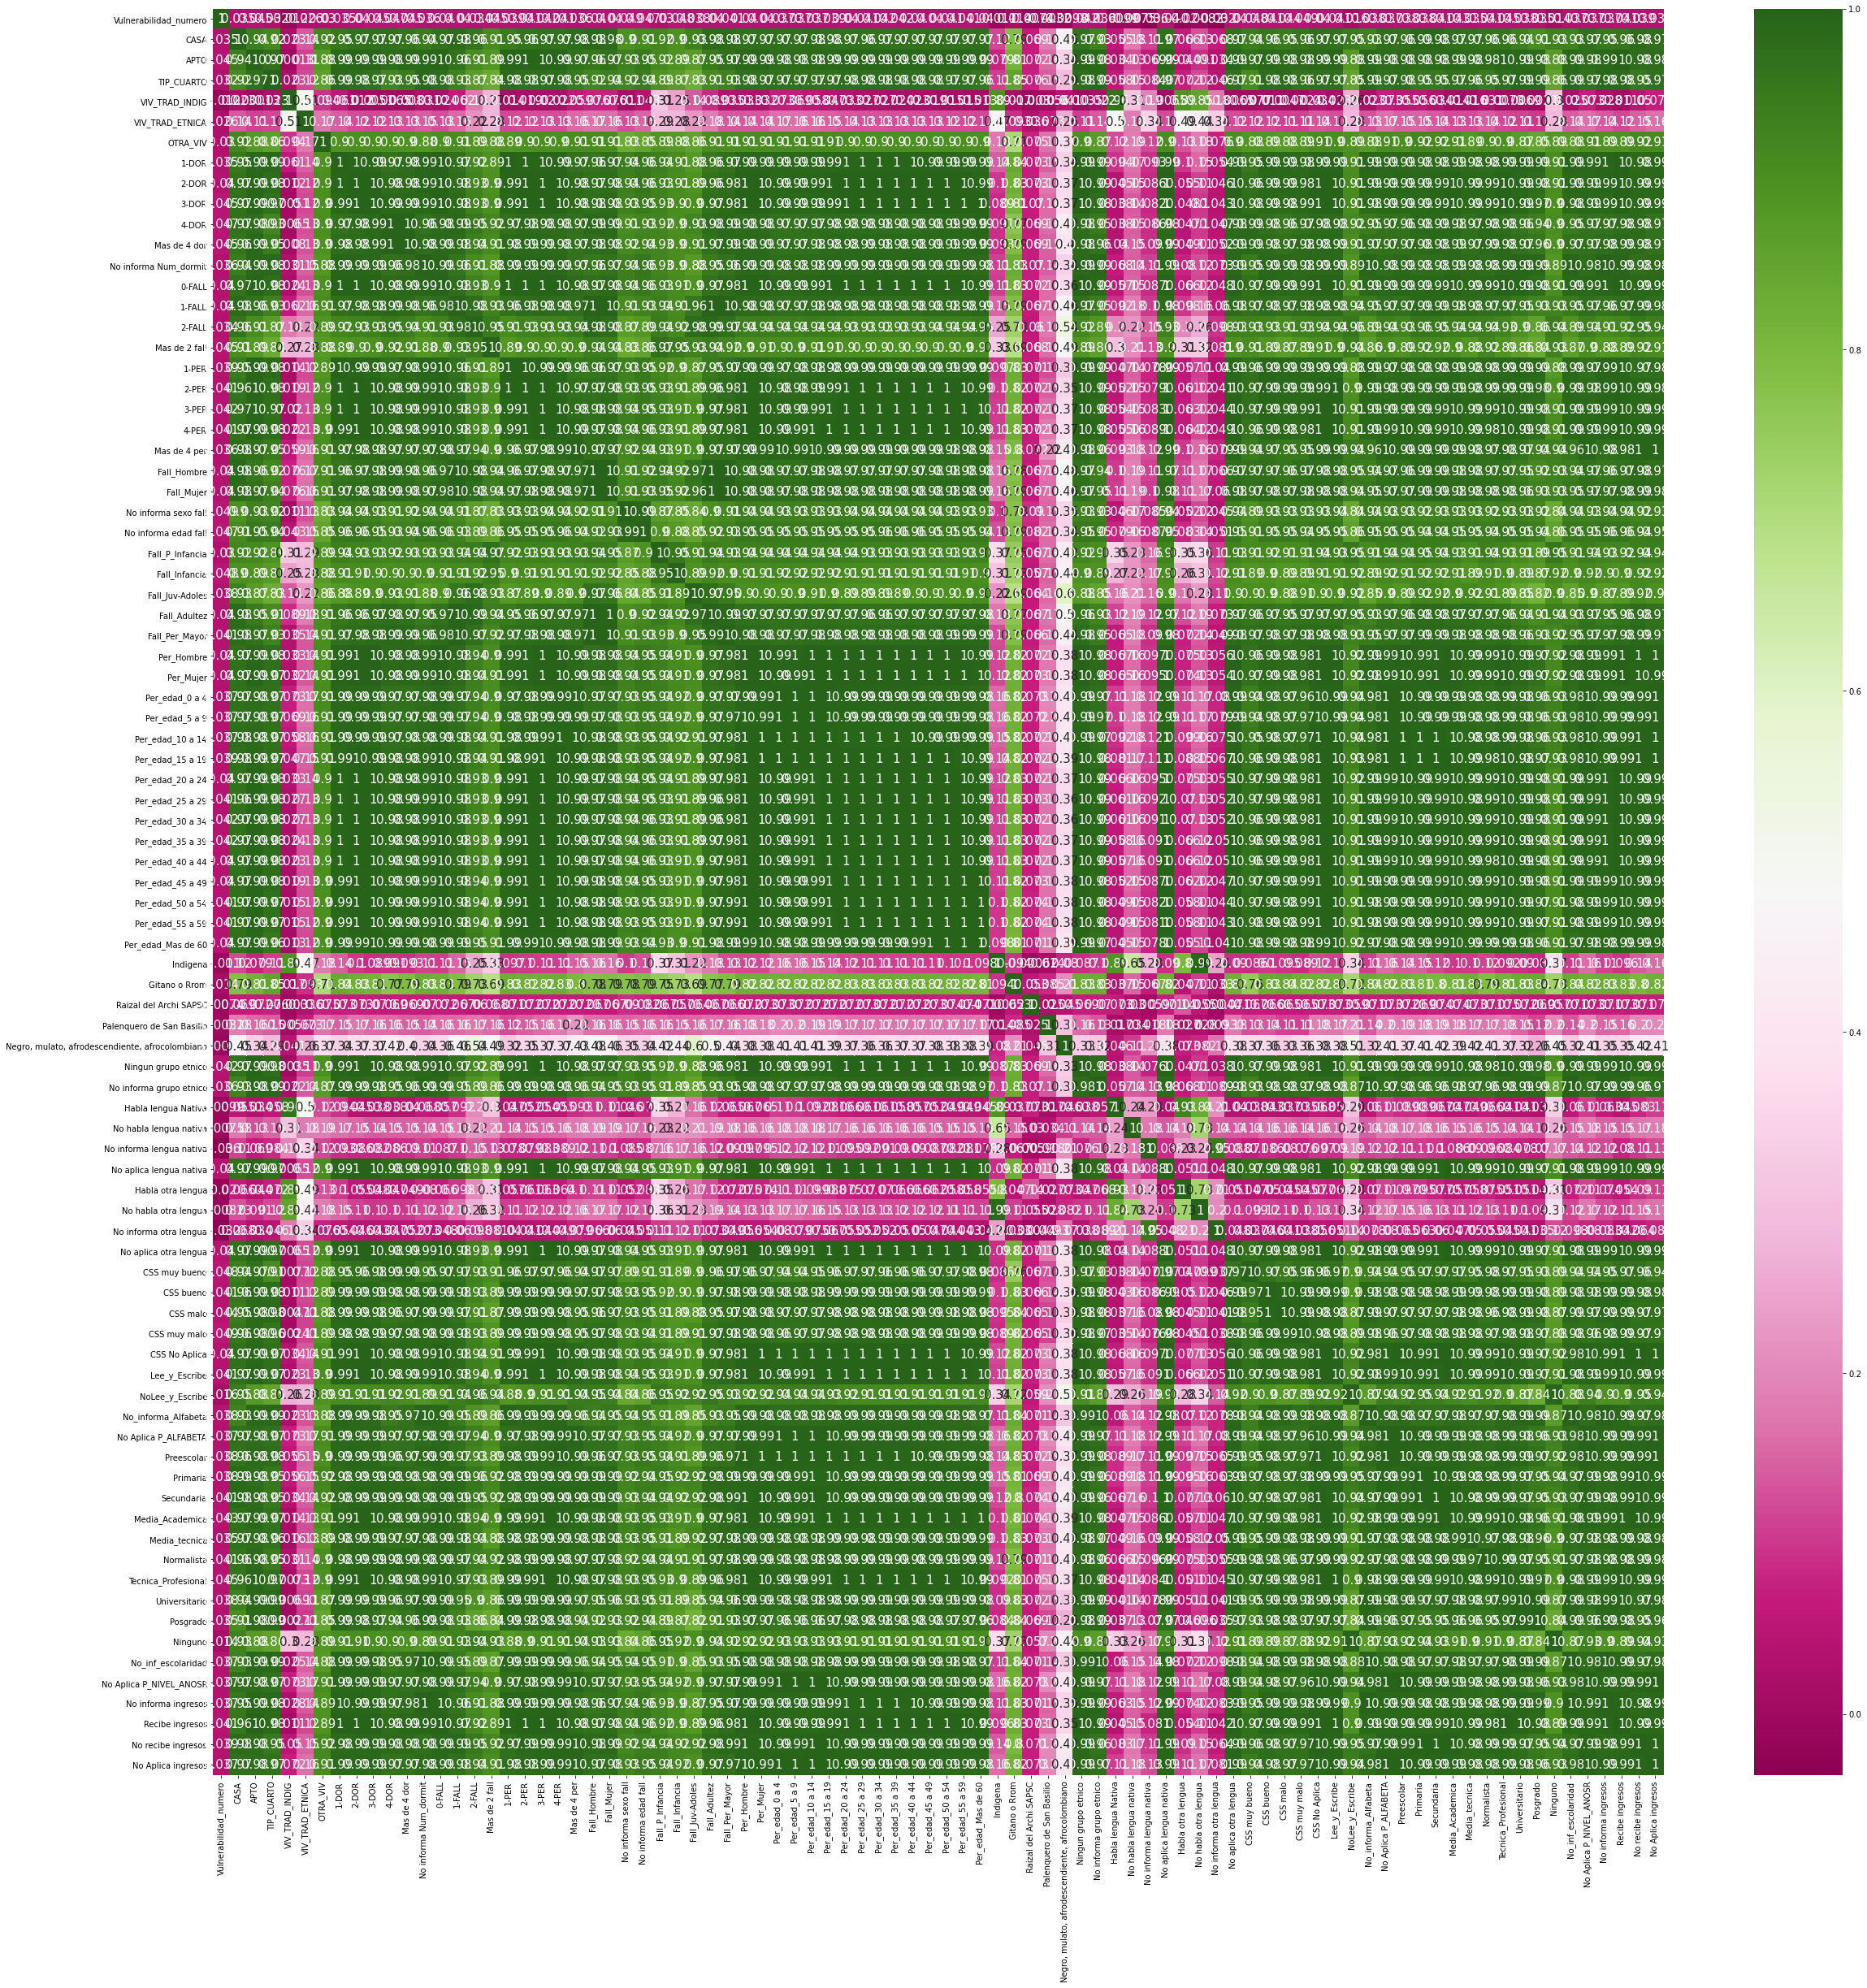

In [14]:
df_dataset_c.Vulnerabilidad_numero = df_dataset_c.Vulnerabilidad_numero.astype(float)
corr_df = df_dataset_c.corr(method="pearson")
print("La correlacion del dataframe es: ")
print(corr_df,"\n")
plt.figure(figsize=(40, 40))
sns.heatmap(corr_df,cmap = 'PiYG', annot=True, annot_kws={'size': 15})
plt.show()

C:\Users\sebas\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


La correlacion del dataframe es: 
                         Vulnerabilidad_numero      CASA      APTO  \
Vulnerabilidad_numero                 1.000000  0.008705  0.046694   
CASA                                  0.008705  1.000000  0.777574   
APTO                                  0.046694  0.777574  1.000000   
TIP_CUARTO                            0.053688  0.791230  0.770336   
VIV_TRAD_INDIG                        0.011670  0.478543  0.251437   
...                                        ...       ...       ...   
No Aplica P_NIVEL_ANOSR               0.004423  0.903021  0.694501   
No informa ingresos                   0.011732  0.870032  0.659299   
Recibe ingresos                       0.022888  0.955203  0.826839   
No recibe ingresos                    0.012217  0.947473  0.724875   
No Aplica ingresos                    0.007507  0.905541  0.700933   

                         TIP_CUARTO  VIV_TRAD_INDIG  VIV_TRAD_ETNICA  \
Vulnerabilidad_numero      0.053688        0.011670  

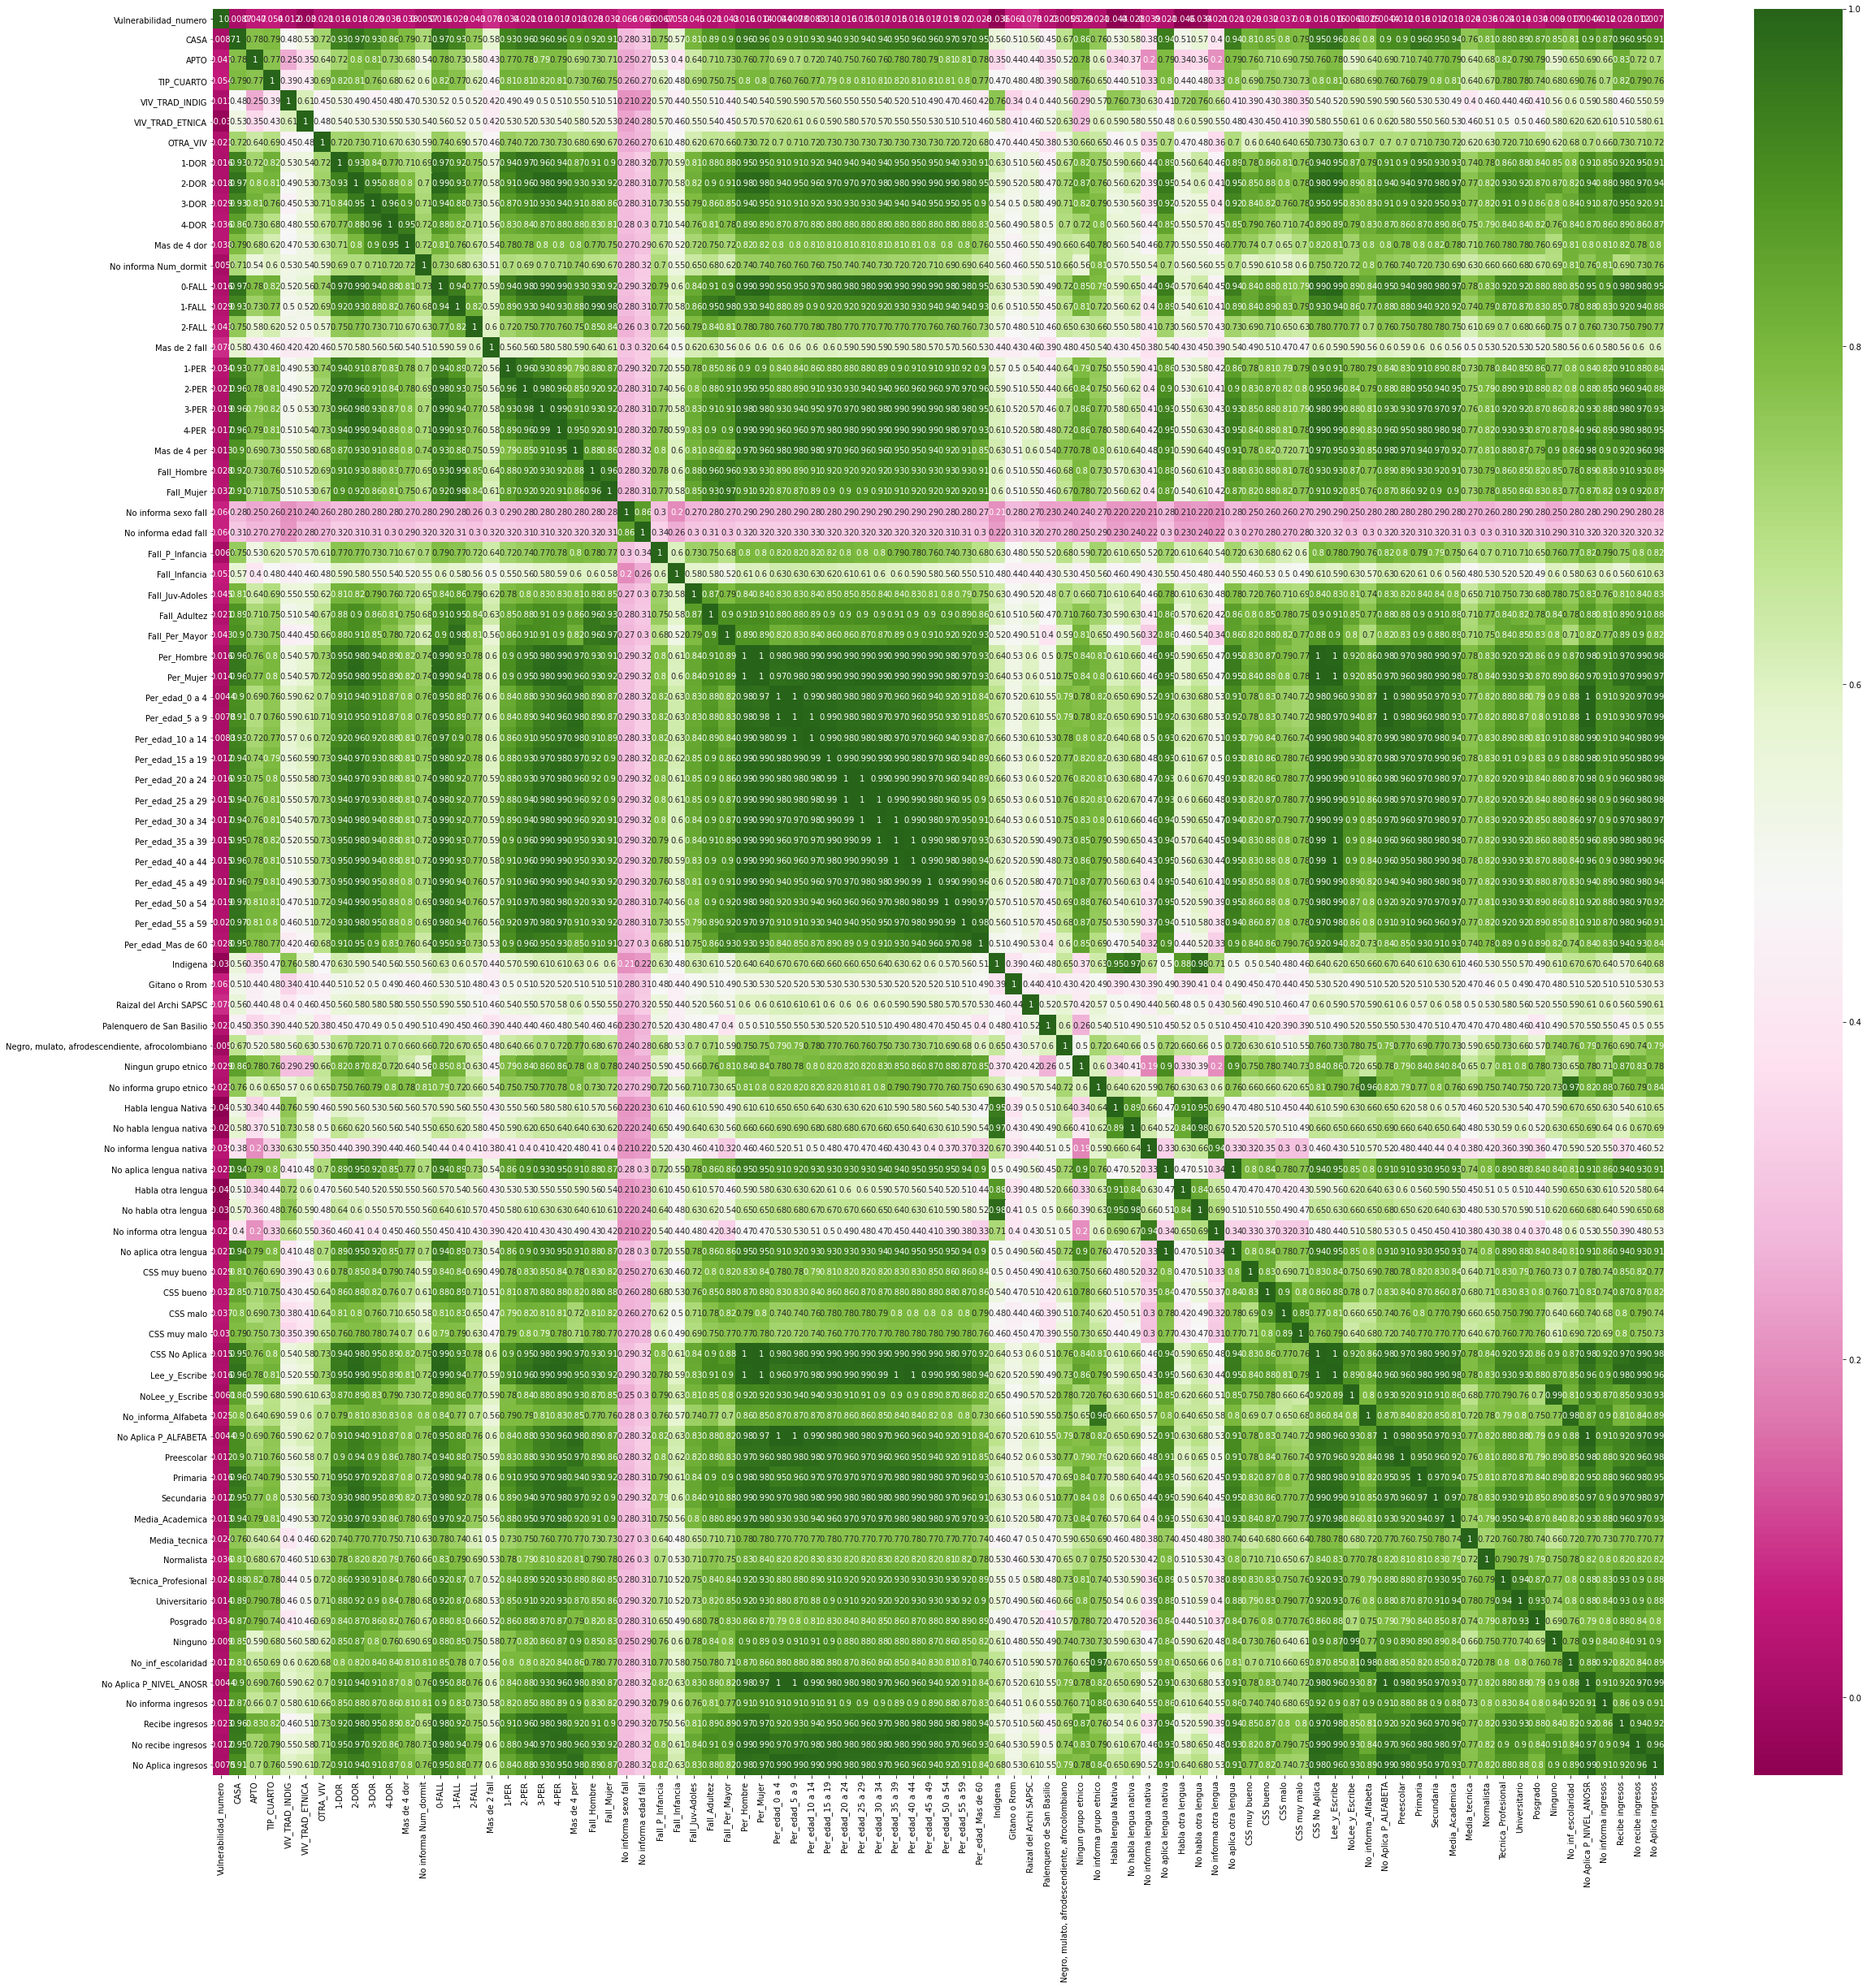

In [15]:
df_dataset_c.Vulnerabilidad_numero = df_dataset_c.Vulnerabilidad_numero.astype(float)
corr_df = df_dataset_c.corr(method="spearman")
print("La correlacion del dataframe es: ")
print(corr_df,"\n")
plt.figure(figsize=(40, 40))
sns.heatmap(corr_df,cmap = 'PiYG', annot=True)
plt.show()

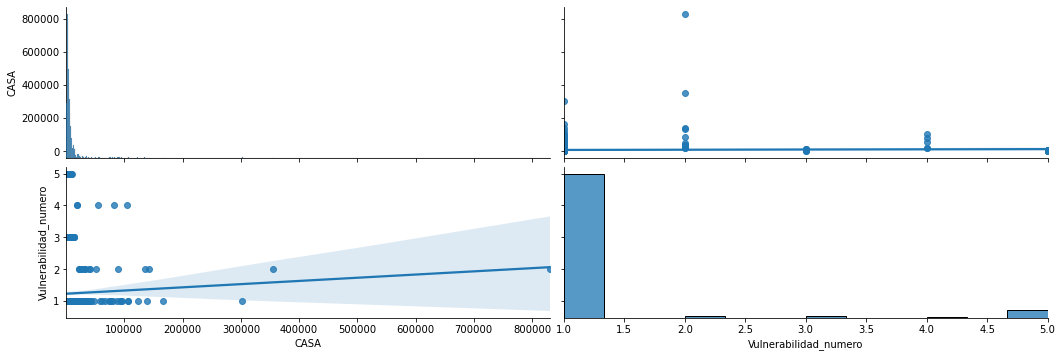

In [16]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
#sns.pairplot(df_dataset_c, x_vars=["CASA","CASA","APTO","TIP_CUARTO","VIV_TRAD_INDIG","1-DOR","1-FALL","2-PER","Fall_Mujer","Per_edad_20 a 24","Indigena","Lee_y_Escribe"], y_vars='Vulnerabilidad_numero', size=20, aspect=1, kind='reg')
sns.pairplot(df_dataset_c, vars=["CASA",'Vulnerabilidad_numero'],size=2.5, aspect=3, kind='reg')
plt.show()

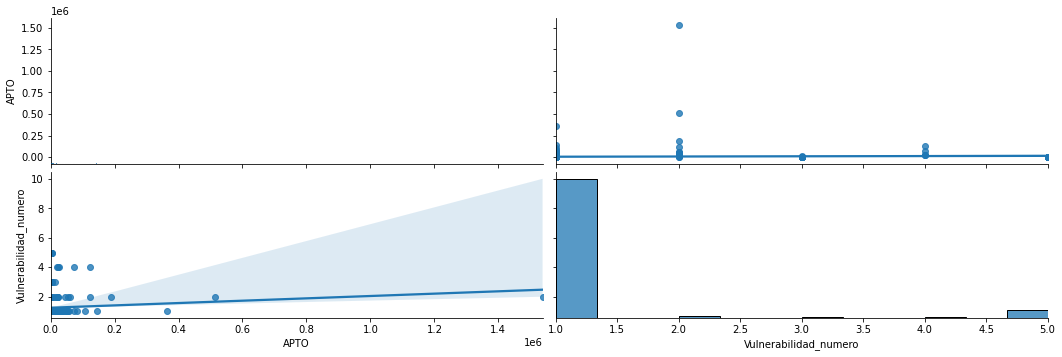

In [17]:
sns.pairplot(df_dataset_c, vars=["APTO",'Vulnerabilidad_numero'],size=2.5, aspect=3, kind='reg')
plt.show()

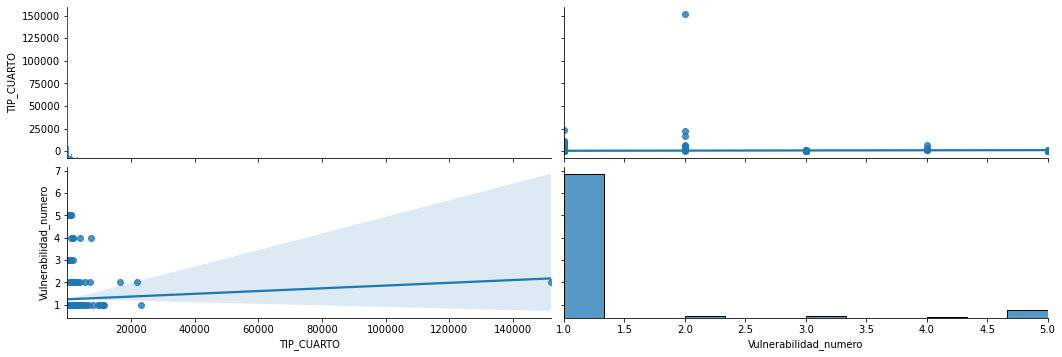

In [18]:
sns.pairplot(df_dataset_c, vars=["TIP_CUARTO",'Vulnerabilidad_numero'],size=2.5, aspect=3, kind='reg')
plt.show()

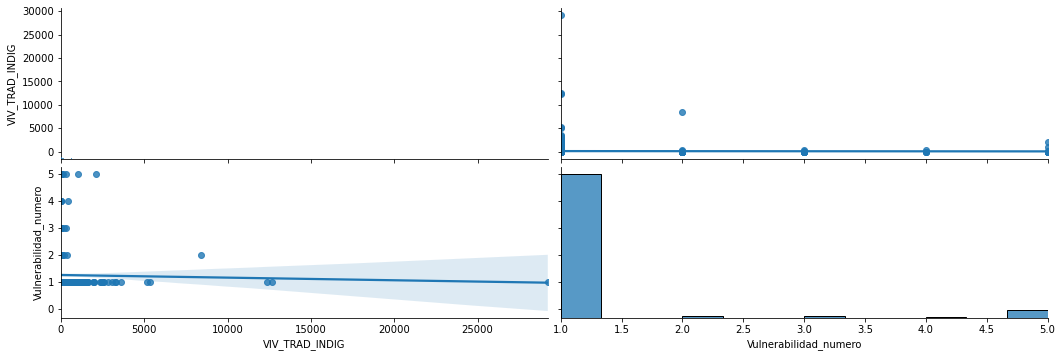

In [19]:
sns.pairplot(df_dataset_c, vars=["VIV_TRAD_INDIG",'Vulnerabilidad_numero'],size=2.5, aspect=3, kind='reg')
plt.show()

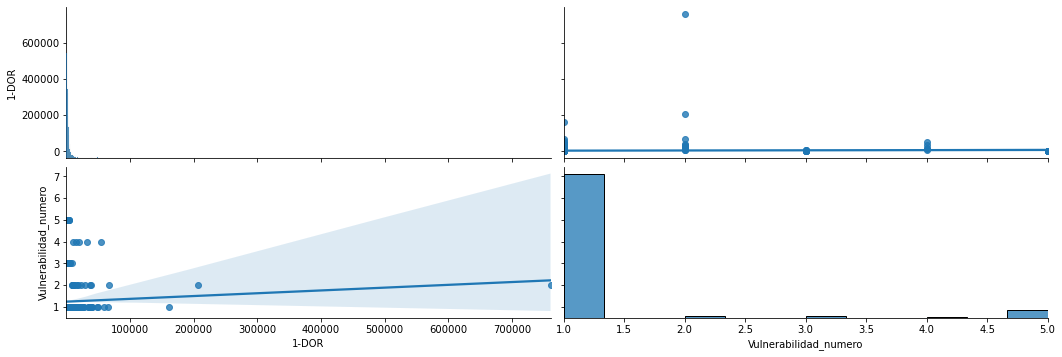

In [20]:
sns.pairplot(df_dataset_c, vars=["1-DOR",'Vulnerabilidad_numero'],size=2.5, aspect=3, kind='reg')
plt.show()

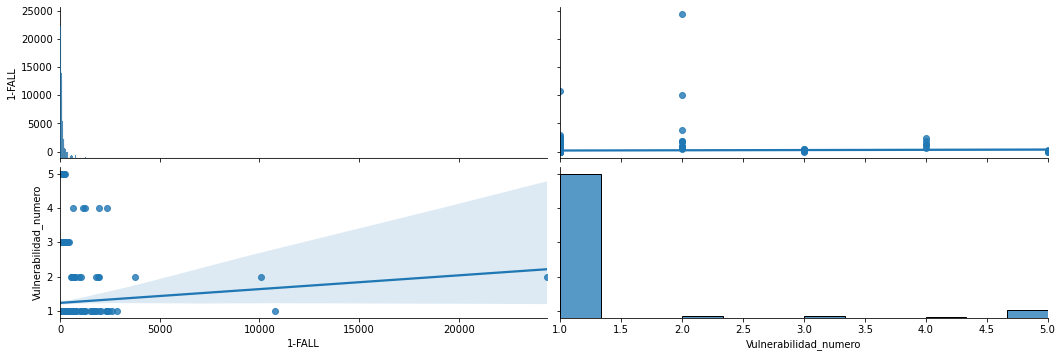

In [21]:
sns.pairplot(df_dataset_c, vars=["1-FALL",'Vulnerabilidad_numero'],size=2.5, aspect=3, kind='reg')
plt.show()

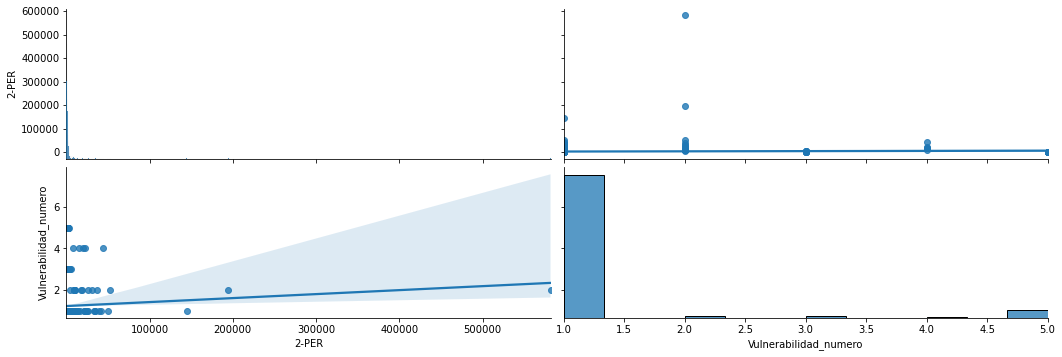

In [22]:
sns.pairplot(df_dataset_c, vars=["2-PER",'Vulnerabilidad_numero'],size=2.5, aspect=3, kind='reg')
plt.show()

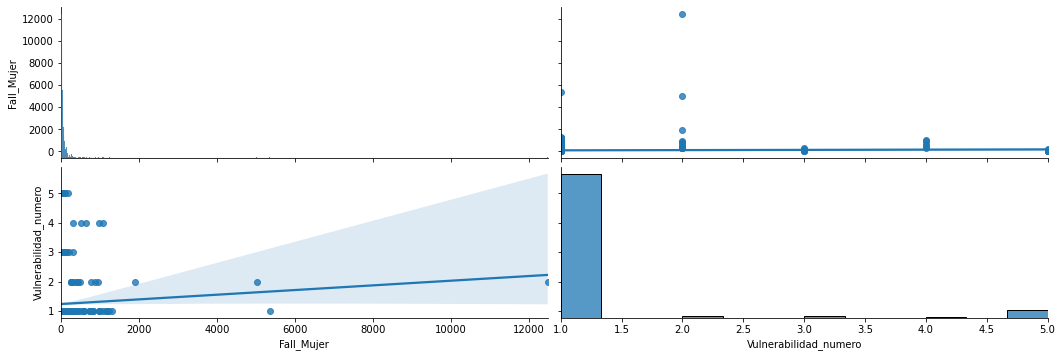

In [23]:
sns.pairplot(df_dataset_c, vars=["Fall_Mujer",'Vulnerabilidad_numero'],size=2.5, aspect=3, kind='reg')
plt.show()

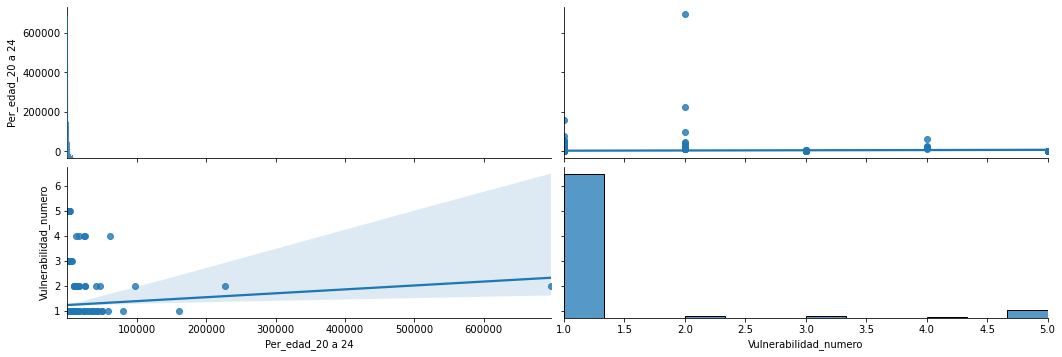

In [24]:
sns.pairplot(df_dataset_c, vars=["Per_edad_20 a 24",'Vulnerabilidad_numero'],size=2.5, aspect=3, kind='reg')
plt.show()

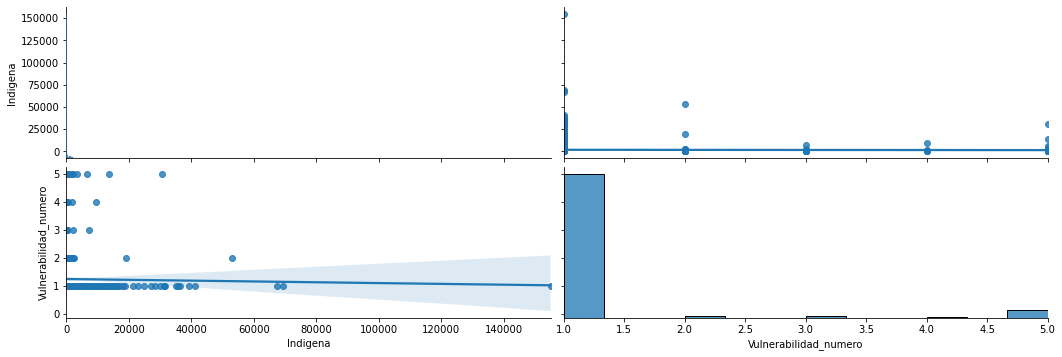

In [25]:
sns.pairplot(df_dataset_c, vars=["Indigena",'Vulnerabilidad_numero'],size=2.5, aspect=3, kind='reg')
plt.show()

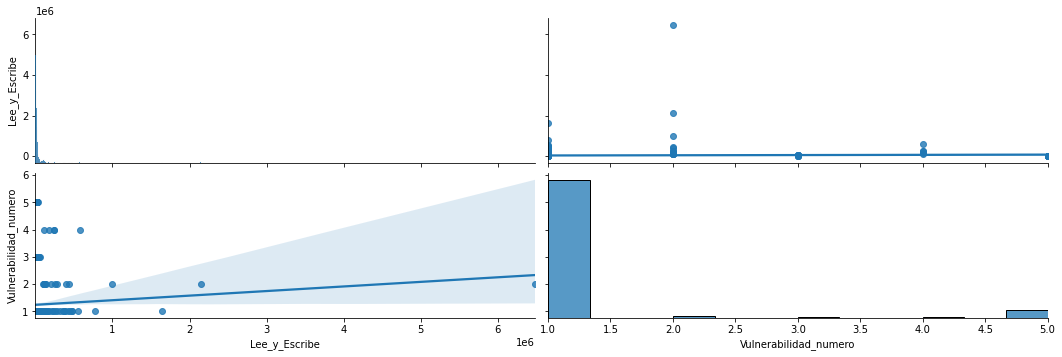

In [26]:
sns.pairplot(df_dataset_c, vars=["Lee_y_Escribe",'Vulnerabilidad_numero'],size=2.5, aspect=3, kind='reg')
plt.show()